# Exploring  the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,0.183092,39.427957,0.309416,0.593864,1190.316392,2.728696,3.057599,2.756876,2.976925,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463
std,0.499947,0.386743,15.119360,0.462255,0.621378,997.452477,1.329340,1.526741,1.401740,1.278520,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.407410,0.495688
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


## Weeding out the outliers so that our models won't try to fit them.

In [6]:
def detect_outlier(feature):
    outliers = []
    data1 = data[feature]
    mean = np.mean(data1)
    std =np.std(data1)
    
    
    for y in data1:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data1.quantile(.95),
                                                             len([i for i in data1
                                                                  if i > data1.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data1.quantile(.99),
                                                           len([i for i in data1
                                                                if i > data1.quantile(.99)])))

In [7]:
for feat in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    detect_outlier(feat)


Outlier caps for Departure Delay in Minutes:
  --95p: 77.0 / 6435 values exceed that
  --3sd: 128.9 / 2748 values exceed that
  --99p: 180.0 / 1290 values exceed that

Outlier caps for Arrival Delay in Minutes:
  --95p: 78.0 / 6463 values exceed that
  --3sd: 130.3 / 2742 values exceed that
  --99p: 182.0 / 1286 values exceed that


In [9]:
data['Departure Delay in Minutes'].clip(upper=data['Departure Delay in Minutes'].quantile(.99), inplace=True)
data['Arrival Delay in Minutes'].clip(upper=data['Arrival Delay in Minutes'].quantile(.99), inplace=True)

In [11]:
data.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.492616,0.183092,39.427957,0.309416,0.593864,1190.316392,2.728696,3.057599,2.756876,2.976925,...,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,13.847197,14.217777,0.434463
std,0.499947,0.386743,15.119360,0.462255,0.621378,997.452477,1.329340,1.526741,1.401740,1.278520,...,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,30.865197,31.225764,0.495688
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,180.000000,182.000000,1.000000


## Visualizing the data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

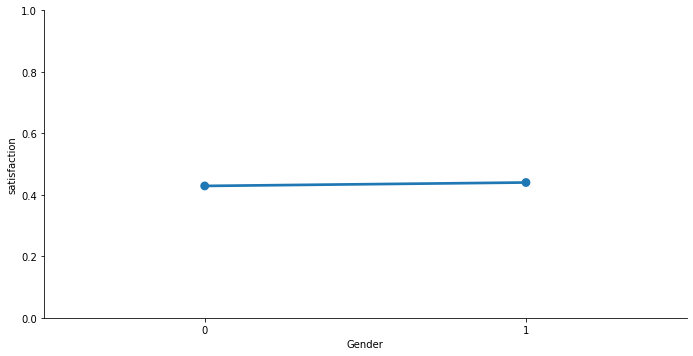

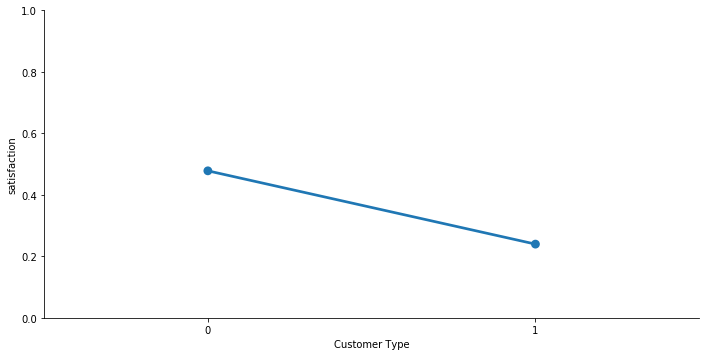

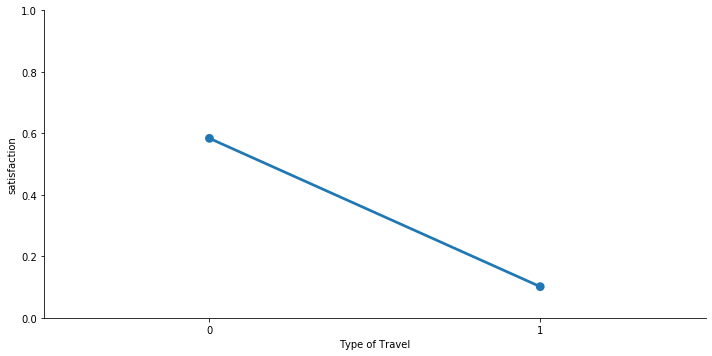

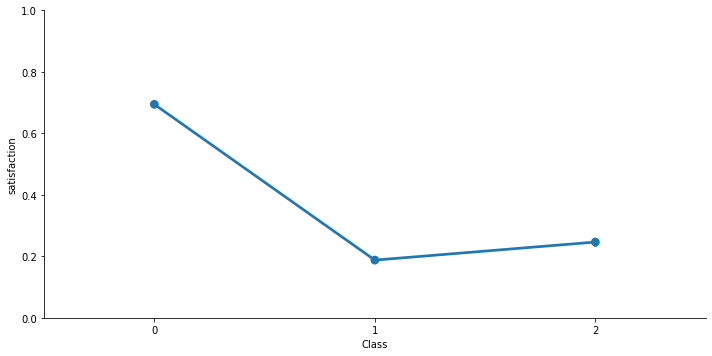

In [14]:
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    sns.catplot(x=col, y='satisfaction', data=data, kind='point', aspect=2, )
    plt.ylim(0, 1)

Acccording to this graphs, we see that loyal customers tend to be more satisfied that disloyal customers. Also Business type and class flights tend to result more satisfied than personal and eco class flights.

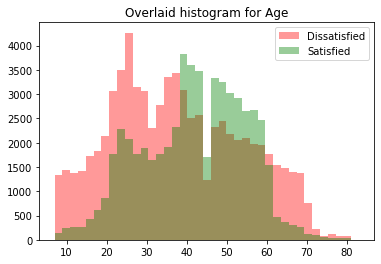

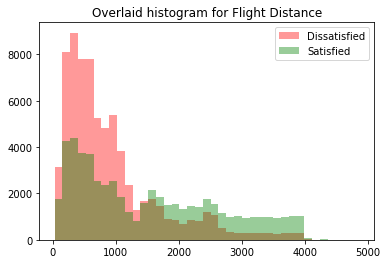

In [16]:
for i in ['Age', 'Flight Distance']:
    satisfied = list(data[data['satisfaction'] == 1][i].dropna())
    dissatisfied = list(data[data['satisfaction'] == 0][i].dropna())
    xmin = min(min(dissatisfied), min(satisfied))
    xmax = max(max(dissatisfied), max(satisfied))
    width = (xmax - xmin) / 40
    sns.distplot(dissatisfied, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(satisfied, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Dissatisfied', 'Satisfied'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

These graphs say that, ages between 0-40 tend to be dissatisfied.

Longer distance flights tend to be satisfied.

## Using Cox-Box transformation to decrease flight distance skew

In [19]:
import scipy.stats

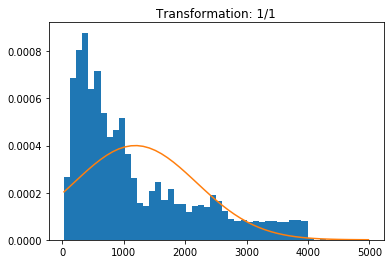

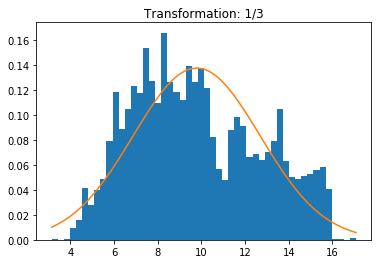

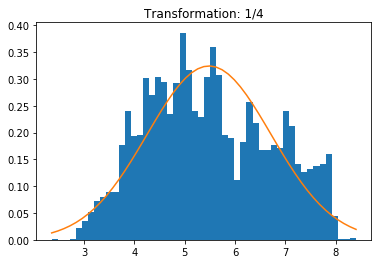

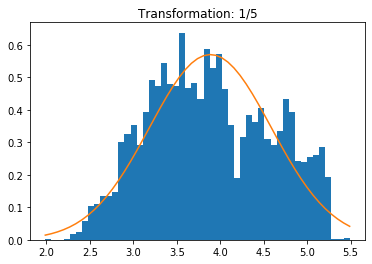

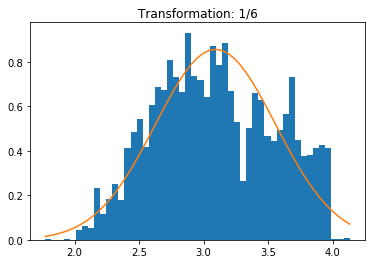

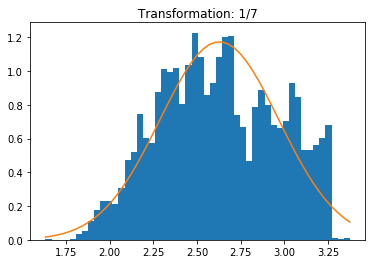

In [21]:
for i in [1, 3, 4, 5, 6, 7]:
    data_t = data['Flight Distance']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [22]:
data['Flight Distance'] = data['Flight Distance'].apply(lambda x: x**(1/5))
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,3.408408,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,2.979982,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,4.088210,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,3.547703,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,2.924710,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## Corrolation HeatMap

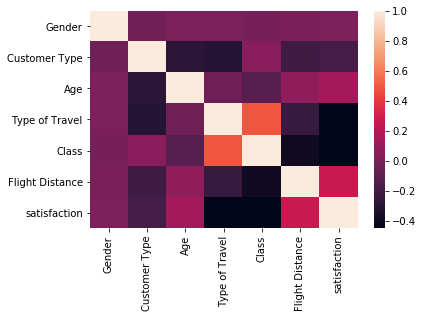

In [55]:
df = pd.DataFrame(data)
df.drop(df.iloc[:, 6:22], inplace = True, axis = 1)
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns)

In [56]:
data.to_csv('data.csv', index = False)